$\Large\textbf{Lab 3.}$ $\large\textbf{Exercise 1.}$



In the last lab, when we tried to solve certain problems of the form $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ using gradient descent algorithm, we noticed that the algorithm needed a large number of iterations to find the minimizer. Today we will discuss some remedy measures for this issue.  

Consider the problem $\min_{\mathbf{x}} f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$. 

Note that the function $f(\mathbf{x})$ is twice continuously differentiable. First let us investigate the Hessian $\nabla^2 f(\mathbf{x})$ of the function. 

Note that the Hessian $\nabla^2 f(\mathbf{x})$ of the function $f(\mathbf{x})$ is positive definite. 

Due to the positive definite nature of the Hessian, we shall find the condition number of the Hessian given by $\kappa\left (\nabla^2 f(\mathbf{x}) \right ) = \frac{\lambda_{\max} \left (\nabla^2 f(\mathbf{x}) \right )}{\lambda_{\min} \left (\nabla^2 f(\mathbf{x}) \right )}$, where $\lambda_{\max}(\mathbf{A})$ denotes the maximum eigen value of matrix $\mathbf{A}$ and $\lambda_{\min}(\mathbf{A})$ denotes the minimum eigen value of matrix $\mathbf{A}$.  




$\textbf{Question:}$ Write code to find the Hessian matrix of the function $f(\mathbf{x}) = 1500x_1^2 + 4x_1 x_2 +  x_2^2$ and its condition number. 

$\large \textbf{Question 1 [R]:} \text{Consider the function} \\  f(x) = 1500x_1^2+ 4x_1x_2 + x_2^2 \\
\text{Write code to find the Hessian matrix of f and its
condition number.}$

In [1]:
import numpy as np 

#method to find Hessian matrix: Complete the code
def evalh(x): 
  assert type(x) is np.ndarray 
  assert len(x) == 2
  a=np.array([3000,4,4,2]).reshape(2,2)
  return a

#method to find the condition number of any square matrix: : Complete the code
def find_condition_number(A):
  assert type(A) is np.ndarray
  assert A.shape[0] == A.shape[1]
  eigen_values=np.linalg.eig(A)[0]
  return max(eigen_values)/min(eigen_values)


The condition number of the Hessian plays a major role in the progress of the iterates of gradient descent towards the optimal solution point. Typically a large value of the condition number indicates that the problem is $\textbf{ill-conditioned}$ and hence leads to slow progress of the iterates towards the optimal solution point. Now we shall discuss a method which would help in better $\textbf{conditioning}$ of the problem and hence would help in speeding up the progress of the iterates towards the optimal solution point. 

Let us first illustrate an equivalent transformation of the problem $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$. Consider the transformation $\mathbf{x}=\mathbf{My}$ where $\mathbf{M}\in {\mathbb{R}}^{n \times n}$ is an invertible matrix and $\mathbf{y} \in {\mathbb{R}}^n$ and consider the equivalent problem $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y}) \equiv \min_{\mathbf{y} \in {\mathbb{R}}^n} f(\mathbf{My})$. 

$\textbf{Check:}$ Why are the two problems $\min_{\mathbf{x} \in {\mathbb{R}}^n} f(\mathbf{x})$ and $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y})$  equivalent? 

Note that the gradient $\nabla_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla_{\mathbf{x}} f(\mathbf{x})$ and the Hessian is $\nabla^2_{\mathbf{y}} g(\mathbf{y}) = \mathbf{M}^\top \nabla^2_{\mathbf{x}} f(\mathbf{x}) \mathbf{M}$. 

Hence the gradient descent update to solve $\min_{\mathbf{y} \in {\mathbb{R}}^n} g(\mathbf{y})$ becomes: 


\begin{align}
{\mathbf{y}}^{k+1} &= {\mathbf{y}}^{k} - \eta \nabla_{\mathbf{y}} g({\mathbf{y}}^{k}) \\
\end{align}

Pre-multiplying by $\mathbf{M}$, we have:
\begin{align}
{\mathbf{M}\mathbf{y}}^{k+1} &= {\mathbf{M}\mathbf{y}}^{k} -  \eta \mathbf{M} \nabla_{\mathbf{y}} g({\mathbf{y}}^{k})  \\
\implies \mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{MM}^\top \nabla_{\mathbf{x}} f({\mathbf{x}}^{k}) 
\end{align}


Letting $\mathbf{D} = \mathbf{MM}^\top$, we see that the update is of the form:
\begin{align}
\mathbf{x}^{k+1} &= \mathbf{x}^{k} - \eta \mathbf{D} \nabla f({\mathbf{x}}^{k}) 
\end{align}

Note that the matrix $\mathbf{D}$ is symmetric and positive definite and hence can be written as $\mathbf{D} = \mathbf{B}^2$, where $\mathbf{B}$ is also symmetric and positive definite. Denoting $\mathbf{B}= \mathbf{D}^{\frac{1}{2}}$, we see that a useful choice for the matrix $\mathbf{M}$ is $\mathbf{M} = \mathbf{B} = \mathbf{D}^{\frac{1}{2}}$. 

The matrix $\mathbf{D}$ is called a $\textbf{scaling}$ matrix and helps in scaling the Hessian. We will consider $\mathbf{D}$ to be a diagonal matrix. Thus it would be useful to find a suitable candidate of the scaling matrix at each iteration which could help in significant progress of the iterates towards the optimal solution. 




This discussion leads to the following algorithm:
\begin{align}
& \textbf{Input:} \text{ Starting point $x^0$, Stopping tolerance $\tau$}  \\
& \textbf{Initialize } k=0 \\ 
& \mathbf{p}^k =-\nabla f(\mathbf{x}^k) \\ 
&\textbf{While } \| \mathbf{p}^k \|_2 > \tau \text{ do:}  \\   
&\quad \quad \text{ Choose a suitable scaling matrix }\mathbf{D}^k. \\ 
&\quad \quad \eta^k = \arg\min_{\eta\geq 0} f(\mathbf{x}^k + \eta  \mathbf{D}^k \mathbf{p}^k) = \arg\min_{\eta\geq 0} f(\mathbf{x}^k - \eta  \mathbf{D}^k \nabla f(\mathbf{x}^k)) \\
&\quad \quad \mathbf{x}^{k+1} = \mathbf{x}^k + \eta^k \mathbf{D}^k \mathbf{p}^k = \mathbf{x}^k - \eta^k  \mathbf{D}^k \nabla f(\mathbf{x}^k)  \\ 
&\quad \quad k = {k+1} \\ 
&\textbf{End While} \\
&\textbf{Output: } \mathbf{x}^k
\end{align}

Note that the update step in the modified gradient descent scheme uses a scaled gradient. Thus it becomes important to set up some criteria for choosing the $\mathbf{D}^k$ matrix in every iteration. In this exercise, we will assume $\mathbf{D}^k$ to be a diagonal matrix. The following questions will help in designing a suitable $\mathbf{D}^k$.

$\large \textbf{Question.2[R]} $

$\textbf{Question:}$ Based on our discussion on condition number and the derivation of the gradient descent scheme with scaling, can you identify and write down the matrix $\mathbf{Q}$ whose condition number needs to be analyzed in the new gradient scheme with scaling? 

$\textbf{ Answer:} \  \text{Since we can write our function in form of } x^{T}Qx+b^{T}x \ \text{.So condition number of Q must be analyzed inn the new gradient schem with scalling.} \\ $


$Q=
\begin{bmatrix}
1500 & 2\\
2 & 1
\end{bmatrix}$ 

$\\ \\ \\ \text{In general we can write our Q matrix as product of a diagonal matrix and hessian metrix of function.As folllows: }  \\ \mathbf{Q}  = (\mathbf{D}^k)^{\frac{1}{2}} \mathbf{H}^k (\mathbf{D}^k)^{\frac{1}{2}}\ \ \ \\ \text{Where } \mathbf{D} \ \text{is a diagonal matrix with diagonal elements as reciprocal of eigen values of Hessian matrix and H is hessian matrix.} $

$\large \textbf{Question.3[R]}$

$\textbf{Question:}$ Based on the matrix $\mathbf{Q}$, can you come up with a useful choice for $\mathbf{D}^k$ (assuming $\mathbf{D}^k$ to be diagonal)?


$\textbf{Your Answer:}$

yes we can take $D^k$ as diag  $[(\frac{\delta^2f}{\delta x_1^2})^{-1},(\frac{\delta^2f}{\delta x_2^2})^{-1} , (\frac{\delta^2f}{\delta x_3^2})^{-1}, ...............(\frac{\delta^2f}{\delta x_n^2})^{-1}] \\ i.e. \text{Each diagonal value of D is resiprocal of  corresponding diagonal entry of hessian matrix. }$

Write code to find the matrix $\mathbf{D}^k$. 

In [2]:
#The method defines a way to construct D_k matrix used in scaling the gradient in the modified gradient descent scheme
def compute_D_k(x):
  assert type(x) is np.ndarray
  assert len(x) == 2
  Hes=evalh(x)
  D_k=np.array([1/Hes[0,0],0,0,1/Hes[1,1]]).reshape(2,2)
  return D_k
  
  

In [3]:
#Now we will define a Python function which will compute and return the objective function value 
def evalf(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  return 1500*x[0]**2+4*x[0]*x[1]+x[1]**2
  #after checking if the argument is valid, we can compute the objective function value
  #compute the function value and return it 
  


In [4]:
#Now we will define a Python function which will compute and return the gradient value as a numpy array 
def evalg(x):  
  #Input: x is a numpy array of size 2 
  assert type(x) is np.ndarray and len(x) == 2 #do not allow arbitrary arguments 
  grad_x_1=3000*x[0]+4*x[1]
  grad_x_2=2*x[1]+4*x[0]
  return np.array([grad_x_1,grad_x_2],dtype='float128')
  #after checking if the argument is valid, we can compute the gradient value
  #compute the gradient value and return it 
  

$ \ let \ A= \begin{bmatrix}
1500 & 2\\
2 & 1
\end{bmatrix}$ 


 Given that $f(\mathbf{x})=\mathbf{x}^\top \mathbf{A} \mathbf{x} + 2 \mathbf{b}^\top \mathbf{x}$ \\
we can find $\nabla f(\mathbf{x}) = 2\mathbf{A} \mathbf{x}+2 \mathbf{b} ----(1) $ \\
Since we are to minimize  $f(\mathbf{x} - \alpha \nabla f(\mathbf{x}))=g(\alpha) \   \text{with respect to } \alpha .  \\
\text{By calculas we want to minimize} \ g(\alpha) so 
\\ \frac{δg}{δα} = [\nabla f(x-\alpha\nabla f(\mathbf{x}))]^\top[-\nabla f(\mathbf{x})]   \\
\text{By Fermat's theorem, necessary condition for optimality is:} \\
 \frac{δg}{δα}=0
 ⇒ \  [\nabla f(x-\alpha\nabla f(\mathbf{x}))]^\top[-\nabla f(\mathbf{x})]=0 \\ 
⇒ [-\nabla f(\mathbf{x})]^\top[\nabla f(x-\alpha\nabla f(\mathbf{x}))]=0  \ \ (\text{taking transpose of both sides} )\\
 ⇒[-\nabla f(\mathbf{x})]^\top[2\mathbf{A}(\mathbf{x-α\nabla}f(\mathbf{x})+2b]=0 \ \  \text{By Equation (1)}  \\ ⇒α= \frac{[\nabla f(\mathbf{x})]^⊤[\mathbf{A}\mathbf{x}+\mathbf{b}]}{[\nabla f(\mathbf{x})]^⊤\mathbf{A}\nabla f(\mathbf{x})} \\
 ⇒ α = \frac{[\nabla f(\mathbf{x})]^⊤\nabla f(\mathbf{x})}{\mathbf{2}[\nabla f(\mathbf{x})]^⊤\mathbf{A} \nabla f(\mathbf{x})} \\ \text{Now we are to show that function is minimum at the value of  } \alpha : \\ \nabla^{2}f(x) \text{ is positive definite matrix so at this value of alpha we get a minimum value of function.}$

In [5]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_exact(gradf,A,x): #add appropriate arguments to the function
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(A) is np.ndarray and A.shape[0] == 2 and  A.shape[1] == 2
  numerator=np.dot(evalg(x).transpose(),evalg(x))    
  denominator=2*np.dot(np.dot(evalg(x).transpose(),A),evalg(x))
  step_length=numerator/denominator
   
  return step_length 
  

In [6]:
#Complete the module to compute the steplength by using the closed-form expression
def compute_steplength_backtracking(x, gradf, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0.
  alpha = alpha_start
  p=-gradf
  while evalf(x+alpha*p)> evalf(x)+gamma*alpha*(np.dot(evalg(x).transpose(),p)):
    alpha=alpha*rho
  return alpha
  
  
  

In [7]:
def compute_steplength_backtracking_scaled_direction(x, gradf, direction, alpha_start, rho, gamma): #add appropriate arguments to the function 
  assert type(x) is np.ndarray and len(gradf) == 2 
  assert type(gradf) is np.ndarray and len(gradf) == 2 
  assert type(direction) is np.ndarray and len(direction) == 2 
  assert type(alpha_start) is float and alpha_start>=0. 
  assert type(rho) is float and rho>=0.
  assert type(gamma) is float and gamma>=0.
  alpha = alpha_start
  p=-gradf
  while evalf(x-alpha*np.matmul(direction,gradf))> evalf(x)-gamma*alpha*(np.matmul(evalg(x).transpose(),np.matmul(direction,gradf))):
    alpha=alpha*rho
  return alpha 
  
  
  
  #Complete the code 

In [8]:
#line search type 
EXACT_LINE_SEARCH = 1
BACKTRACKING_LINE_SEARCH = 2
CONSTANT_STEP_LENGTH = 3

In [9]:
#complete the code for gradient descent to find the minimizer
def find_minimizer_gd(start_x, tol, line_search_type,*args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  
  A = np.array([1500,2,2,1]).reshape(2,2)
  x = start_x
  g_x = evalg(x)

  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start = args[0]
    rho = args[1]
    gamma = args[2]
    print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A,x) #call the new function you wrote to compute the steplength
      #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking(x,g_x, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength
      #raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,g_x)) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))
  return x,k 
  


In [10]:
#complete the code for gradient descent with scaling to find the minimizer

def find_minimizer_gdscaling(start_x, tol, line_search_type,*args):
  #Input: start_x is a numpy array of size 2, tol denotes the tolerance and is a positive float value
  assert type(start_x) is np.ndarray and len(start_x) == 2 #do not allow arbitrary arguments 
  assert type(tol) is float and tol>=0 
  A = np.array([[1500, 2],[2,1]])
  x = start_x
  g_x = evalg(x)
  d_k=compute_D_k(x)
  


  #initialization for backtracking line search
  if(line_search_type == BACKTRACKING_LINE_SEARCH):
    alpha_start=args[0]
    rho = args[1]
    gamma = args[2]
    #print('Params for Backtracking LS: alpha start:', alpha_start, 'rho:', rho,' gamma:', gamma)

  k = 0
  #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', g_x, ' gradient norm:', np.linalg.norm(g_x))

  while (np.linalg.norm(g_x) > tol): #continue as long as the norm of gradient is not close to zero upto a tolerance tol
  
    if line_search_type == EXACT_LINE_SEARCH:
      step_length = compute_steplength_exact(g_x, A) #call the new function you wrote to compute the steplength
        #raise ValueError('EXACT LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == BACKTRACKING_LINE_SEARCH:
      step_length = compute_steplength_backtracking_scaled_direction(x,g_x,d_k, alpha_start,rho, gamma) #call the new function you wrote to compute the steplength      
     # raise ValueError('BACKTRACKING LINE SEARCH NOT YET IMPLEMENTED')
    elif line_search_type == CONSTANT_STEP_LENGTH: #do a gradient descent with constant step length
      step_length = 0.1   
    else:  
      raise ValueError('Line search type unknown. Please check!')
    
    #implement the gradient descent steps here   
    x = np.subtract(x, np.multiply(step_length,np.matmul(d_k,evalg(x)))) #update x = x - step_length*g_x
    k += 1 #increment iteration
    g_x = evalg(x) #compute gradient at new point
    d_k=compute_D_k(x)

    #print('iter:',k, ' x:', x, ' f(x):', evalf(x), ' grad at x:', dir, ' gradient norm:', np.linalg.norm(g_x))
  return x,k

  #Complete the code   

$\large \textbf{Question [R]:} \text{Note down the minimizer and minimum function value of} \\  f(x) = 1500x_1^2
+ 4x_1x_2 + x_2^2
. $

$\large \textbf{Answer: minimizer of function is : (0,0)} \\ \textbf{minimum function value is 0.}$

$\large \textbf{Question [R]:} \text{ With starting point}  \\ 
x_0= (1,4000) \\ \text{and a stopping tolerance τ = 10−12, find the number of iterations taken
by the gradient descent algorithm (without scaling) with exact line search, gradient descent algorithm (without
scaling) with backtracking line search, gradient descent algorithm (with scaling) with backtracking line search.} \\ \text{
For backtracking line search, use α0 = 1, ρ = 0.5, γ = 0.5. Note the minimizer and minimum objective function
value in each case. Comment on your observations.}$

In [11]:
my_start_x = np.array([1.,4000.])
my_tol= 1e-12

$\large \textbf{Exaxt line search method} $

In [12]:
#check gradient descent with exact line search
opt_x,number_of_iter=find_minimizer_gd(my_start_x,my_tol,EXACT_LINE_SEARCH)
print('minimizer is :',opt_x)
print('number of iterations taken :',number_of_iter)
print('minimum value of function:',evalf(opt_x))



minimizer is : [-7.44595231e-16  4.61544291e-13]
number of iterations taken : 14075
minimum value of function: 2.1248011077928182463e-25


$\text{number of iteration taken to reach optimal  condition:}=14075  \\ \text{minimizer of function:}= [-7.44595231e-16  4.61544291e-13] ≃ [0,0] \\ \text{minimum function value is :}= 2.1248011077928182463e-25 ≃ 0 $

$\large \textbf{Using backtracking line search method without scalling:}$

In [13]:
#check gradient descent with backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
opt_x_bls,number_of_iter_bls=find_minimizer_gd(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
print('minimizer is :',opt_x_bls)
print('number of iterations taken :',number_of_iter_bls)
print('minimum value of function:',evalf(opt_x_bls))



Params for Backtracking LS: alpha start: 1.0 rho: 0.5  gamma: 0.5
minimizer is : [-4.78532202e-16  4.53575301e-13]
number of iterations taken : 21985
minimum value of function: 2.0520584176089342136e-25


$\text{number of iteration taken to reach optimal  condition:}=21985  \\ \text{minimizer of function:}= [-4.78532202e-16  4.53575301e-13] ≃ [0,0] \\ \text{minimum function value is :}= 2.0520584176089342136e-25 ≃ 0 $

$\large \textbf{Using backtracking line search method with scalling:} $

In [14]:
#check gradient descent with scaling and backtracking line search 
alpha_start = 1.
rho = 0.5
gamma = 0.5
opt_x_bls,number_of_iter_bls=find_minimizer_gdscaling(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
print('minimizer is :',opt_x_bls)
print('number of iterations taken :',number_of_iter_bls)
print('minimum value of function:',evalf(opt_x_bls))

minimizer is : [-2.31674405e-18  9.60515434e-16]
number of iterations taken : 16
minimum value of function: 9.217397790469289959e-31


$\text{number of iteration taken to reach optimal  condition:}=16  \\ \text{minimizer of function:}= [-2.31674405e-18  9.60515434e-16] ≃ [0,0] \\ \text{minimum function value is :}= 9.217397790469289959e-31 ≃ 0 $

 $ \large \textbf{Question[R]:}  $ 
  With starting point $x_0 $= (1, 4000) and τ = 10−12, we will now study the behavior of gradient descent algorithm
(without scaling) with backtracking line search, gradient descent algorithm (with scaling) with backtracking
line search, for different choices of α0. Take γ = ρ = 0.5. Try $α_0$ ∈ {1, 0.9, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01}.
For each α0, record the final minimizer, final objective function value and number of iterations to terminate,
for the gradient descent algorithm (without scaling) with backtracking line search and the gradient descent
algorithm (with scaling) with backtracking line search. Prepare a plot where the number of iterations for
both the algorithms are plotted against α0 values. Use different colors and a legend to distinguish the plots
corresponding to the different algorithms. Comment on the observations. Comment about the minimizers and
objective function values obtained for different choices of the α0 values for the two algorithms.

In [15]:
alpha_values=[1.0,0.9,0.75,0.6,0.5,0.4,0.25,0.1,0.01] 
my_start_x=np.array([1,4000])
my_tol= 1/10**(12)
rho=0.5
gamma=0.5
iter_list=[]
iter_list_scl=[]
for alpha in alpha_values:
  print('when alpha is :',alpha)
  print('\n----------------------------------------------------------------------------\n')
  print('backtracking line search method without scalling')
  opt_x_bls,number_of_iter_bls=find_minimizer_gd(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha,rho,gamma)
  print('minimizer is :',opt_x_bls)
  print('number of iterations taken :',number_of_iter_bls)
  print('minimum value of function:',evalf(opt_x_bls))
  iter_list.append(number_of_iter_bls)
  print('\n----------------------------------------------------------------------------\n')
  print('backtracking line search method with scalling')
  opt_x_bls,number_of_iter_bls=find_minimizer_gdscaling(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
  print('minimizer is :',opt_x_bls)
  print('number of iterations taken :',number_of_iter_bls)
  print('minimum value of function:',evalf(opt_x_bls))
  iter_list_scl.append(number_of_iter_bls)
  print('\n----------------------------------------------------------------------------\n')
  print('\n----------------------------------------------------------------------------\n')
print(iter_list)  
print(iter_list_scl)




when alpha is : 1.0

----------------------------------------------------------------------------

backtracking line search method without scalling
Params for Backtracking LS: alpha start: 1.0 rho: 0.5  gamma: 0.5
minimizer is : [-4.78532202e-16  4.53575301e-13]
number of iterations taken : 21985
minimum value of function: 2.0520584176089342136e-25

----------------------------------------------------------------------------

backtracking line search method with scalling
minimizer is : [-2.31674405e-18  9.60515434e-16]
number of iterations taken : 16
minimum value of function: 9.217397790469289959e-31

----------------------------------------------------------------------------


----------------------------------------------------------------------------

when alpha is : 0.9

----------------------------------------------------------------------------

backtracking line search method without scalling
Params for Backtracking LS: alpha start: 0.9 rho: 0.5  gamma: 0.5
minimizer is : [-5.

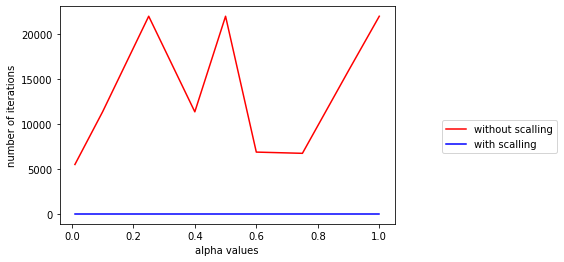

In [ ]:
import matplotlib.pyplot as plt
plt.plot(alpha_values,iter_list,color='r')
plt.plot(alpha_values,iter_list_scl,color='b')
plt.xlabel('alpha values')
plt.ylabel('number of iterations')
plt.legend(['without scalling','with scalling'],bbox_to_anchor=(1.50, 0.5))
plt.show()

$\large \textbf{Observations on iterations taken to reach optimality:}\text{As we can see that number of iterations taken to reach optimality without} \\ \large \text{ scalling does not follow any specific pattern but as the alpha value decrease to zero then number of iterations decreases so fast. but in compare } \\ \large \text{ of without scalling if we talk about the backward line search method using scalling always take 16 iterations to reach optimal condition } \\ \large \text{ so we can conclude that after scalling our gradient descent is taking a low number of iterations to reach optimal condition.} $

$ \large \textbf{Observations  on minimizers and objective function value:}  \\ \text{As we can see that } x_1 \text{is tending to zero from negative side as iterations occurs and }  x_2 \text{ tends to zero from positive side as iterations occures } \\ \text{and we can see that for all values all alpha we get a solution which is almost equal to (0,0) and minumum function value is also} \\ \text{ approximately equal to zero.  }$

$\large \textbf{Question:} $ \\ R] With starting point x0 = (1, 4000) and τ = 10−12, we will now study the behavior of gradient descent algorithm
(without scaling) with backtracking line search, gradient descent algorithm (with scaling) with backtracking
line search, for different choices of ρ. Take α = 1, γ = 0.5. Try ρ ∈ {0.9, 0.8, 0.75, 0.6, 0.5, 0.4, 0.25, 0.1, 0.01}.
For each ρ, record the final minimizer, final objective function value and number of iterations to terminate,
for the gradient descent algorithm (without scaling) with backtracking line search and the gradient descent
algorithm (with scaling) with backtracking line search. Prepare a plot where the number of iterations for
both the algorithms are plotted against ρ values. Use different colors and a legend to distinguish the plots
corresponding to the different algorithms. Comment on the observations. Comment about the minimizers and
objective function values obtained for different choices of the ρ values for both the algorithms.

In [16]:

rho_values=[0.01,0.1,0.25,0.4,0.5,0.6,0.75,0.8,0.9]
my_start_x=np.array([1,4000])
my_tol= 1/10**(12)
alpha=1.0
gamma=0.5
iter_list=[]
iter_list_scl=[]
for rho in rho_values:
  print('when rho is :',rho)
  print('\n----------------------------------------------------------------------------\n')
  print('backtracking line search method without scalling')
  opt_x_bls,number_of_iter_bls=find_minimizer_gd(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha,rho,gamma)
  print('minimizer is :',opt_x_bls)
  print('number of iterations taken :',number_of_iter_bls)
  print('minimum value of function:',evalf(opt_x_bls))
  iter_list.append(number_of_iter_bls)
  print('\n----------------------------------------------------------------------------\n')
  print('backtracking line search method with scalling')
  opt_x_bls,number_of_iter_bls=find_minimizer_gdscaling(my_start_x,my_tol,BACKTRACKING_LINE_SEARCH,alpha_start,rho,gamma)
  print('minimizer is :',opt_x_bls)
  print('number of iterations taken :',number_of_iter_bls)
  print('minimum value of function:',evalf(opt_x_bls))
  iter_list_scl.append(number_of_iter_bls)
  print('\n----------------------------------------------------------------------------\n')
  print('\n----------------------------------------------------------------------------\n')
print(iter_list)  
print(iter_list_scl)

when rho is : 0.01

----------------------------------------------------------------------------

backtracking line search method without scalling
Params for Backtracking LS: alpha start: 1.0 rho: 0.01  gamma: 0.5
minimizer is : [-6.03891924e-16  4.89972672e-13]
number of iterations taken : 17463
minimum value of function: 2.3943668542911699835e-25

----------------------------------------------------------------------------

backtracking line search method with scalling
minimizer is : [-5.88632151e-16  4.39928337e-13]
number of iterations taken : 130
minimum value of function: 1.9302084997635642937e-25

----------------------------------------------------------------------------


----------------------------------------------------------------------------

when rho is : 0.1

----------------------------------------------------------------------------

backtracking line search method without scalling
Params for Backtracking LS: alpha start: 1.0 rho: 0.1  gamma: 0.5
minimizer is : [-4.

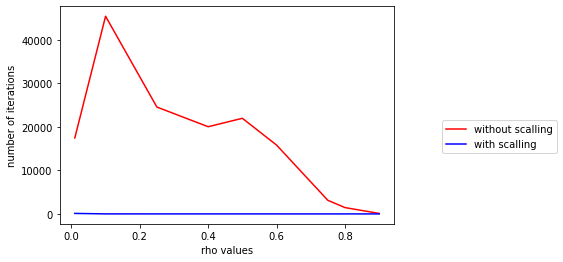

In [19]:
import matplotlib.pyplot as plt
plt.plot(rho_values,iter_list,color='r')
plt.plot(rho_values,iter_list_scl,color='b')
plt.xlabel('rho values')
plt.ylabel('number of iterations')
plt.legend(['without scalling','with scalling'],bbox_to_anchor=(1.50, 0.5))
plt.show()

$\large \textbf{Observations on iterations taken to reach optimality:} \\ \text{As we can see that if we talk about backtracking line search method without scalling then it is clear from curve that as soon as} \\ \text{  rho value increases and becomes closer to 1 then number of iteration decreases fastly and at value of rho 0.9 it becomes 126 iterations} \\ \text{But if we talk about backtracking linear search method with scalling has almost same number of iterations for all rho values.} \\ \text{ For value of rho = 0.01 number of iterations are 130 which are higher than other iterations taken to reach optimality condition for }\\ \text{  other rho values. but for other values of rho number of iterations are same. } $

$ \large \textbf{Observations  on minimizers and objective function value:}  \\ \text{As we can see that } x_1 \text{is tending to zero from negative side as iterations occurs and }  x_2 \text{ tends to zero from positive side as iterations occures } \\ \text{and we can see that for all values all alpha we get a solution which is almost equal to (0,0) and minumum function value is also} \\ \text{ approximately equal to zero.  }$